In [1]:
=from __future__ import division, unicode_literals, print_function  # for compatibility with Python 2 and 3

import matplotlib as mpl
import matplotlib.pyplot as plt

# change the following to %matplotlib notebook for interactive plotting
%matplotlib inline

# Optionally, tweak styles.
mpl.rc('figure',  figsize=(10, 5))
mpl.rc('image', cmap='gray')

In [2]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series  # for convenience
import pims
import trackpy as tp
!pip install --upgrade pims tifffile
!pip install imageio

                                              0.0/221.9 kB ? eta -:--:--
     -----                                   30.7/221.9 kB 1.4 MB/s eta 0:00:01
     -----                                   30.7/221.9 kB 1.4 MB/s eta 0:00:01
     -----                                   30.7/221.9 kB 1.4 MB/s eta 0:00:01
     ----------                            61.4/221.9 kB 328.2 kB/s eta 0:00:01
     ---------------                       92.2/221.9 kB 403.5 kB/s eta 0:00:01
     ---------------                       92.2/221.9 kB 403.5 kB/s eta 0:00:01
     -----------------------              143.4/221.9 kB 426.7 kB/s eta 0:00:01
     ----------------------------         174.1/221.9 kB 456.4 kB/s eta 0:00:01
     ------------------------------------ 221.9/221.9 kB 521.5 kB/s eta 0:00:00
  Attempting uninstall: tifffile
    Found existing installation: tifffile 2023.7.10
    Uninstalling tifffile-2023.7.10:
      Successfully uninstalled tifffile-2023.7.10


In [3]:
frames_single_tiff=pims.open('50mg DAY 1 MODIFIED .tif')
frames_single_tiff


<Frames>
Source: 50mg DAY 1 MODIFIED .tif
Length: 1148 frames
Frame Shape: (536, 536)
Pixel Datatype: uint8

In [4]:
#import imageio
#frames_single_tiff = imageio.imread('modified 0.3 64fps.tif')
#frames_single_tiff

In [5]:
type(frames_single_tiff)
frames_single_tiff.shape

(1148, 536, 536)

In [6]:
frames_single_tiff

<Frames>
Source: 50mg DAY 1 MODIFIED .tif
Length: 1148 frames
Frame Shape: (536, 536)
Pixel Datatype: uint8

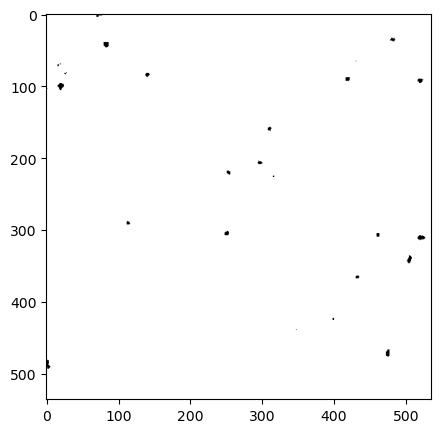

In [7]:
plt.imshow(frames_single_tiff[0])

In [8]:
print(frames_single_tiff[0])

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


Frame([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)
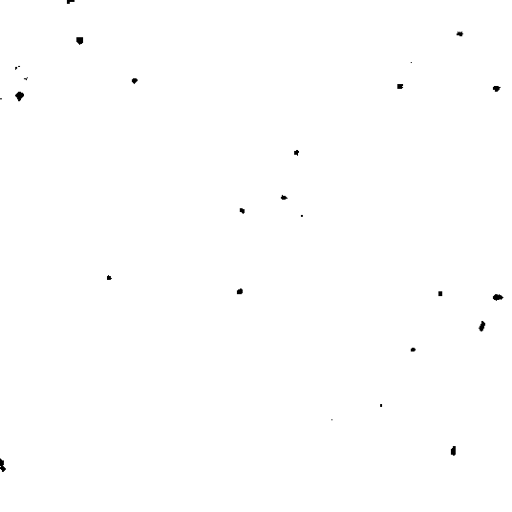

In [9]:
frames_single_tiff[0]

In [10]:
f = tp.locate(frames_single_tiff[0], 7, invert=True) #locates images of an avg size of 7 pixels in the first frame of the movie 

In [11]:
f.head()  # shows the first few rows of data ## mass is intensity of that particular pixel 

,y,x,mass,size,ecc,signal,raw_mass,ep,frame
0,35.110079,481.503574,1578.995523,1.752666,0.244541,121.895294,4845.0,0.0,0
1,40.587442,81.557862,1087.464036,1.827115,0.088884,95.936111,4590.0,0.0,0
2,70.708520,16.417937,629.228023,1.347644,0.231111,98.193431,1275.0,0.0,0
3,82.042991,26.573832,603.833170,1.390220,0.367103,85.213840,1275.0,0.0,0
4,83.975197,140.216576,1865.675196,1.790274,0.124032,120.202304,6120.0,0.0,0


In [12]:
f.columns

Index(['y', 'x', 'mass', 'size', 'ecc', 'signal', 'raw_mass', 'ep', 'frame'], dtype='object')

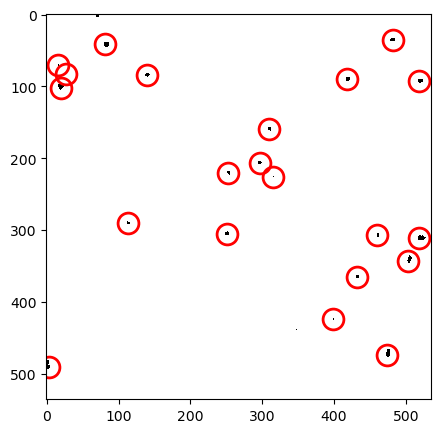

In [13]:
tp.annotate(f, frames_single_tiff[0]); # as per the scale 10 micron = 56 pixels  # individual size 1-2 micron

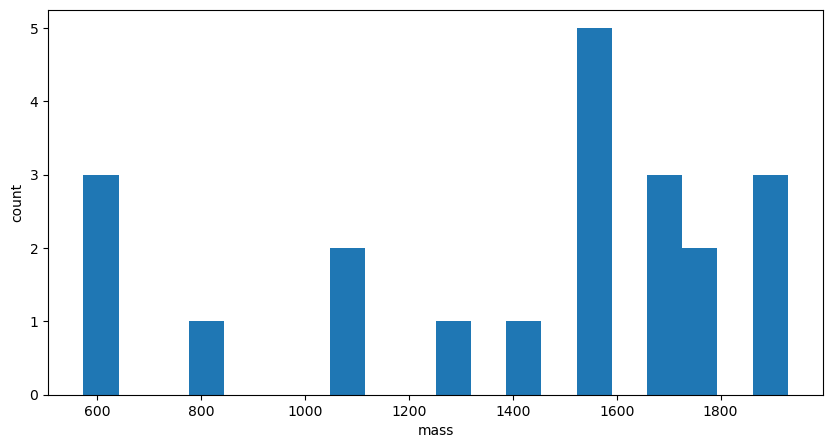

In [14]:
fig, ax = plt.subplots()
ax.hist(f['mass'], bins=20)

# Optionally, label the axes.
ax.set(xlabel='mass', ylabel='count');

In [15]:
f = tp.locate(frames_single_tiff[0], 7, invert=True, minmass=800)

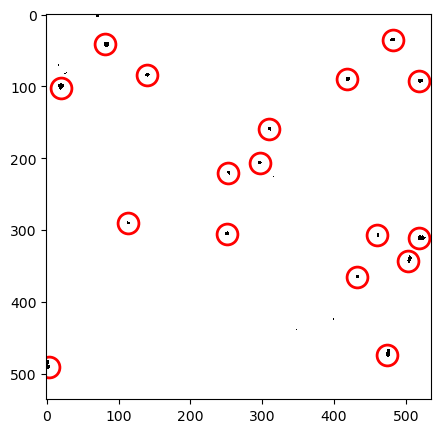

In [16]:
tp.annotate(f, frames_single_tiff[0]);

In [17]:
f

,y,x,mass,size,ecc,signal,raw_mass,ep,frame
0,35.110079,481.503574,1578.995523,1.752666,0.244541,121.895294,4845.0,0.0,0
1,40.587442,81.557862,1087.464036,1.827115,0.088884,95.936111,4590.0,0.0,0
4,83.975197,140.216576,1865.675196,1.790274,0.124032,120.202304,6120.0,0.0,0
5,89.977186,418.129570,1929.444494,1.890154,0.130474,107.787043,6375.0,0.0,0
6,92.043450,518.470108,1727.414330,1.935585,0.176679,96.500441,6120.0,0.0,0
7,102.705493,19.775178,1109.472909,1.791383,0.119063,93.678791,5100.0,0.0,0
8,159.174503,309.903642,1704.276798,1.687900,0.135355,133.181895,5100.0,0.0,0
9,206.403509,296.313765,1672.674314,1.748336,0.259787,128.667255,5100.0,0.0,0
10,220.050227,253.022035,1741.522582,1.735322,0.251292,128.102925,5355.0,0.0,0
12,290.381546,113.618454,1584.074494,1.656028,0.096399,137.132206,4590.0,0.0,0


In [18]:

import itertools

frames = list(itertools.chain(frames_single_tiff[:15], frames_single_tiff[16:]))
f = tp.batch(frames, 7, minmass=800, invert=True)



Frame 1147: 12 features


In [19]:
f

,y,x,mass,size,ecc,signal,raw_mass,ep,frame
0,35.110079,481.503574,1578.995523,1.752666,0.244541,121.895294,4845.0,0.0,0
1,40.587442,81.557862,1087.464036,1.827115,0.088884,95.936111,4590.0,0.0,0
2,83.975197,140.216576,1865.675196,1.790274,0.124032,120.202304,6120.0,0.0,0
3,89.977186,418.129570,1929.444494,1.890154,0.130474,107.787043,6375.0,0.0,0
4,92.043450,518.470108,1727.414330,1.935585,0.176679,96.500441,6120.0,0.0,0
...,...,...,...,...,...,...,...,...,...
18567,343.000000,254.000000,1183.099516,1.369098,0.038721,152.754621,2805.0,0.0,1147
18568,349.060290,399.257326,1778.543019,1.721518,0.058642,131.189263,5610.0,0.0,1147
18569,389.864148,81.712724,1807.895868,1.916497,0.173965,105.430640,6375.0,0.0,1147
18570,391.290482,170.682419,1812.688169,1.825501,0.041392,112.020055,5865.0,0.0,1147


In [20]:
#type(f)
#y_values = f['y']
#x_values = f['x']
#plt.plot(x_values, y_values)
#plt.xlabel('x')
#plt.ylabel('y')
#plt.title('Graph of x and y')
#plt.show()


In [21]:
f.columns

Index(['y', 'x', 'mass', 'size', 'ecc', 'signal', 'raw_mass', 'ep', 'frame'], dtype='object')

In [22]:
#frame_numbers = pd.DataFrame({'frame': range(len(f))})
#f_with_frame = pd.concat([f, frame_numbers], axis=1)
#print(f_with_frame.head())
#f_with_frame = f_with_frame.loc[:, ~f_with_frame.columns.duplicated()]
#f_with_frame

In [23]:
#f['frame'] = range(len(f))

In [24]:
t = tp.link(f, 5, memory=3)

Frame 1147: 12 trajectories present.


In [25]:
t

,y,x,mass,size,ecc,signal,raw_mass,ep,frame,particle
0,35.110079,481.503574,1578.995523,1.752666,0.244541,121.895294,4845.0,0.0,0,0
16,490.677657,2.904555,1300.780801,1.634365,0.051322,115.123333,5100.0,0.0,0,1
15,473.669928,474.071739,1557.550981,1.823856,0.053060,106.658382,5865.0,0.0,0,2
14,365.579905,431.889334,1550.214690,1.586253,0.218199,143.904167,4335.0,0.0,0,3
13,343.595238,503.611241,1445.813628,1.820282,0.080763,102.708072,5355.0,0.0,0,4
...,...,...,...,...,...,...,...,...,...,...
18561,28.075964,10.012472,1585.053832,1.851028,0.148315,106.029678,6120.0,0.0,1147,2216
18560,25.134207,60.134207,959.658443,1.278361,0.182044,142.570980,2040.0,0.0,1147,2237
18570,391.290482,170.682419,1812.688169,1.825501,0.041392,112.020055,5865.0,0.0,1147,2238
18564,97.870385,262.796950,1492.802022,1.956899,0.036169,91.652773,6375.0,0.0,1147,2258


In [26]:
#y_values = t['y']
#x_values = t['x']
#plt.plot(x_values, y_values)
#plt.xlabel('x')
#plt.ylabel('y')
#plt.title('Graph of x and y')
#plt.show()

In [27]:
t['frame'].nunique()

1147

In [28]:
t1 = tp.filter_stubs(t, 5)
print('Before:', t['particle'].nunique())
print('After:', t1['particle'].nunique())
#print(t1)
t1
#print(type(t1))
                                                                                                                                   #The DataFrame you provided contains 29,628 rows, indicating that it includes 944 particles with multiple positions recorded across different frames.



Before: 2267
After: 528


,y,x,mass,size,ecc,signal,raw_mass,ep,frame,particle
frame,,,,,,,,,,
0,35.110079,481.503574,1578.995523,1.752666,0.244541,121.895294,4845.0,0.0,0,0
0,490.677657,2.904555,1300.780801,1.634365,0.051322,115.123333,5100.0,0.0,0,1
0,473.669928,474.071739,1557.550981,1.823856,0.053060,106.658382,5865.0,0.0,0,2
0,304.999703,250.332047,1901.792321,1.916197,0.177936,101.579412,6375.0,0.0,0,6
0,290.381546,113.618454,1584.074494,1.656028,0.096399,137.132206,4590.0,0.0,0,7
...,...,...,...,...,...,...,...,...,...,...
1147,61.570214,523.543607,1620.996096,1.836438,0.238792,115.015244,5100.0,0.0,1147,2255
1147,28.075964,10.012472,1585.053832,1.851028,0.148315,106.029678,6120.0,0.0,1147,2216
1147,25.134207,60.134207,959.658443,1.278361,0.182044,142.570980,2040.0,0.0,1147,2237


In [29]:
import numpy as np
import pandas as pd

 #Get the unique particle IDs from the DataFrame
particle_ids = np.unique(t1['particle'])

 #Create empty DataFrames to store the coordinates
x_df = pd.DataFrame(index=particle_ids)
y_df = pd.DataFrame(index=particle_ids)

 #Iterate over each particle ID
for particle_id in particle_ids:
    # Filter the DataFrame for the current particle ID
    particle_df = t1[t1['particle'] == particle_id]
    
   #  Extract the x and y coordinates for the current particle
    x_coords = particle_df['x'].values
    y_coords = particle_df['y'].values
    
    # Add the coordinates to the DataFrames as separate columns
    x_df[f'Particle {particle_id}'] = pd.Series(x_coords)
    y_df[f'Particle {particle_id}'] = pd.Series(y_coords)

 # Save the DataFrames to separate Excel sheets
with pd.ExcelWriter('efgh.xlsx') as writer:
    x_df.to_excel(writer, sheet_name='X Coordinates')
    y_df.to_excel(writer, sheet_name='Y Coordinates')
                                                                                                 #gives the correct code excatly what richa ma'am has asked for  





C:\Users\AFZAL AMANULLAH\AppData\Local\Temp\ipykernel_25392\3641890221.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  x_df[f'Particle {particle_id}'] = pd.Series(x_coords)
C:\Users\AFZAL AMANULLAH\AppData\Local\Temp\ipykernel_25392\3641890221.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  y_df[f'Particle {particle_id}'] = pd.Series(y_coords)
C:\Users\AFZAL AMANULLAH\AppData\Local\Temp\ipykernel_25392\3641890221.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.in

C:\Users\AFZAL AMANULLAH\AppData\Local\Temp\ipykernel_25392\3641890221.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  y_df[f'Particle {particle_id}'] = pd.Series(y_coords)
C:\Users\AFZAL AMANULLAH\AppData\Local\Temp\ipykernel_25392\3641890221.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  x_df[f'Particle {particle_id}'] = pd.Series(x_coords)
C:\Users\AFZAL AMANULLAH\AppData\Local\Temp\ipykernel_25392\3641890221.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.in

C:\Users\AFZAL AMANULLAH\AppData\Local\Temp\ipykernel_25392\3641890221.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  x_df[f'Particle {particle_id}'] = pd.Series(x_coords)
C:\Users\AFZAL AMANULLAH\AppData\Local\Temp\ipykernel_25392\3641890221.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  y_df[f'Particle {particle_id}'] = pd.Series(y_coords)
C:\Users\AFZAL AMANULLAH\AppData\Local\Temp\ipykernel_25392\3641890221.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.in

C:\Users\AFZAL AMANULLAH\AppData\Local\Temp\ipykernel_25392\3641890221.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  x_df[f'Particle {particle_id}'] = pd.Series(x_coords)
C:\Users\AFZAL AMANULLAH\AppData\Local\Temp\ipykernel_25392\3641890221.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  y_df[f'Particle {particle_id}'] = pd.Series(y_coords)
C:\Users\AFZAL AMANULLAH\AppData\Local\Temp\ipykernel_25392\3641890221.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.in

C:\Users\AFZAL AMANULLAH\AppData\Local\Temp\ipykernel_25392\3641890221.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  x_df[f'Particle {particle_id}'] = pd.Series(x_coords)
C:\Users\AFZAL AMANULLAH\AppData\Local\Temp\ipykernel_25392\3641890221.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  y_df[f'Particle {particle_id}'] = pd.Series(y_coords)
C:\Users\AFZAL AMANULLAH\AppData\Local\Temp\ipykernel_25392\3641890221.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.in

C:\Users\AFZAL AMANULLAH\AppData\Local\Temp\ipykernel_25392\3641890221.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  x_df[f'Particle {particle_id}'] = pd.Series(x_coords)
C:\Users\AFZAL AMANULLAH\AppData\Local\Temp\ipykernel_25392\3641890221.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  y_df[f'Particle {particle_id}'] = pd.Series(y_coords)
C:\Users\AFZAL AMANULLAH\AppData\Local\Temp\ipykernel_25392\3641890221.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.in

C:\Users\AFZAL AMANULLAH\AppData\Local\Temp\ipykernel_25392\3641890221.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  x_df[f'Particle {particle_id}'] = pd.Series(x_coords)
C:\Users\AFZAL AMANULLAH\AppData\Local\Temp\ipykernel_25392\3641890221.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  y_df[f'Particle {particle_id}'] = pd.Series(y_coords)
C:\Users\AFZAL AMANULLAH\AppData\Local\Temp\ipykernel_25392\3641890221.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.in

C:\Users\AFZAL AMANULLAH\AppData\Local\Temp\ipykernel_25392\3641890221.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  y_df[f'Particle {particle_id}'] = pd.Series(y_coords)
C:\Users\AFZAL AMANULLAH\AppData\Local\Temp\ipykernel_25392\3641890221.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  x_df[f'Particle {particle_id}'] = pd.Series(x_coords)
C:\Users\AFZAL AMANULLAH\AppData\Local\Temp\ipykernel_25392\3641890221.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.in

C:\Users\AFZAL AMANULLAH\AppData\Local\Temp\ipykernel_25392\3641890221.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  x_df[f'Particle {particle_id}'] = pd.Series(x_coords)
C:\Users\AFZAL AMANULLAH\AppData\Local\Temp\ipykernel_25392\3641890221.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  y_df[f'Particle {particle_id}'] = pd.Series(y_coords)
C:\Users\AFZAL AMANULLAH\AppData\Local\Temp\ipykernel_25392\3641890221.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.in

C:\Users\AFZAL AMANULLAH\AppData\Local\Temp\ipykernel_25392\3641890221.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  x_df[f'Particle {particle_id}'] = pd.Series(x_coords)
C:\Users\AFZAL AMANULLAH\AppData\Local\Temp\ipykernel_25392\3641890221.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  y_df[f'Particle {particle_id}'] = pd.Series(y_coords)
C:\Users\AFZAL AMANULLAH\AppData\Local\Temp\ipykernel_25392\3641890221.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.in

C:\Users\AFZAL AMANULLAH\AppData\Local\Temp\ipykernel_25392\3641890221.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  x_df[f'Particle {particle_id}'] = pd.Series(x_coords)
C:\Users\AFZAL AMANULLAH\AppData\Local\Temp\ipykernel_25392\3641890221.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  y_df[f'Particle {particle_id}'] = pd.Series(y_coords)
C:\Users\AFZAL AMANULLAH\AppData\Local\Temp\ipykernel_25392\3641890221.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.in

C:\Users\AFZAL AMANULLAH\AppData\Local\Temp\ipykernel_25392\3641890221.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  x_df[f'Particle {particle_id}'] = pd.Series(x_coords)
C:\Users\AFZAL AMANULLAH\AppData\Local\Temp\ipykernel_25392\3641890221.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  y_df[f'Particle {particle_id}'] = pd.Series(y_coords)
C:\Users\AFZAL AMANULLAH\AppData\Local\Temp\ipykernel_25392\3641890221.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.in

C:\Users\AFZAL AMANULLAH\AppData\Local\Temp\ipykernel_25392\3641890221.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  x_df[f'Particle {particle_id}'] = pd.Series(x_coords)
C:\Users\AFZAL AMANULLAH\AppData\Local\Temp\ipykernel_25392\3641890221.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  y_df[f'Particle {particle_id}'] = pd.Series(y_coords)
C:\Users\AFZAL AMANULLAH\AppData\Local\Temp\ipykernel_25392\3641890221.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.in

C:\Users\AFZAL AMANULLAH\AppData\Local\Temp\ipykernel_25392\3641890221.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  y_df[f'Particle {particle_id}'] = pd.Series(y_coords)
C:\Users\AFZAL AMANULLAH\AppData\Local\Temp\ipykernel_25392\3641890221.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  x_df[f'Particle {particle_id}'] = pd.Series(x_coords)
C:\Users\AFZAL AMANULLAH\AppData\Local\Temp\ipykernel_25392\3641890221.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.in

C:\Users\AFZAL AMANULLAH\AppData\Local\Temp\ipykernel_25392\3641890221.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  y_df[f'Particle {particle_id}'] = pd.Series(y_coords)
C:\Users\AFZAL AMANULLAH\AppData\Local\Temp\ipykernel_25392\3641890221.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  x_df[f'Particle {particle_id}'] = pd.Series(x_coords)
C:\Users\AFZAL AMANULLAH\AppData\Local\Temp\ipykernel_25392\3641890221.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.in

C:\Users\AFZAL AMANULLAH\AppData\Local\Temp\ipykernel_25392\3641890221.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  x_df[f'Particle {particle_id}'] = pd.Series(x_coords)
C:\Users\AFZAL AMANULLAH\AppData\Local\Temp\ipykernel_25392\3641890221.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  y_df[f'Particle {particle_id}'] = pd.Series(y_coords)
C:\Users\AFZAL AMANULLAH\AppData\Local\Temp\ipykernel_25392\3641890221.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.in

C:\Users\AFZAL AMANULLAH\AppData\Local\Temp\ipykernel_25392\3641890221.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  x_df[f'Particle {particle_id}'] = pd.Series(x_coords)
C:\Users\AFZAL AMANULLAH\AppData\Local\Temp\ipykernel_25392\3641890221.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  y_df[f'Particle {particle_id}'] = pd.Series(y_coords)
C:\Users\AFZAL AMANULLAH\AppData\Local\Temp\ipykernel_25392\3641890221.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.in

C:\Users\AFZAL AMANULLAH\AppData\Local\Temp\ipykernel_25392\3641890221.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  y_df[f'Particle {particle_id}'] = pd.Series(y_coords)
C:\Users\AFZAL AMANULLAH\AppData\Local\Temp\ipykernel_25392\3641890221.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  x_df[f'Particle {particle_id}'] = pd.Series(x_coords)
C:\Users\AFZAL AMANULLAH\AppData\Local\Temp\ipykernel_25392\3641890221.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.in

C:\Users\AFZAL AMANULLAH\AppData\Local\Temp\ipykernel_25392\3641890221.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  y_df[f'Particle {particle_id}'] = pd.Series(y_coords)
C:\Users\AFZAL AMANULLAH\AppData\Local\Temp\ipykernel_25392\3641890221.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  x_df[f'Particle {particle_id}'] = pd.Series(x_coords)
C:\Users\AFZAL AMANULLAH\AppData\Local\Temp\ipykernel_25392\3641890221.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.in

C:\Users\AFZAL AMANULLAH\AppData\Local\Temp\ipykernel_25392\3641890221.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  x_df[f'Particle {particle_id}'] = pd.Series(x_coords)
C:\Users\AFZAL AMANULLAH\AppData\Local\Temp\ipykernel_25392\3641890221.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  y_df[f'Particle {particle_id}'] = pd.Series(y_coords)
C:\Users\AFZAL AMANULLAH\AppData\Local\Temp\ipykernel_25392\3641890221.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.in

C:\Users\AFZAL AMANULLAH\AppData\Local\Temp\ipykernel_25392\3641890221.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  x_df[f'Particle {particle_id}'] = pd.Series(x_coords)
C:\Users\AFZAL AMANULLAH\AppData\Local\Temp\ipykernel_25392\3641890221.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  y_df[f'Particle {particle_id}'] = pd.Series(y_coords)
C:\Users\AFZAL AMANULLAH\AppData\Local\Temp\ipykernel_25392\3641890221.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.in

C:\Users\AFZAL AMANULLAH\AppData\Local\Temp\ipykernel_25392\3641890221.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  x_df[f'Particle {particle_id}'] = pd.Series(x_coords)
C:\Users\AFZAL AMANULLAH\AppData\Local\Temp\ipykernel_25392\3641890221.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  y_df[f'Particle {particle_id}'] = pd.Series(y_coords)
C:\Users\AFZAL AMANULLAH\AppData\Local\Temp\ipykernel_25392\3641890221.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.in

C:\Users\AFZAL AMANULLAH\AppData\Local\Temp\ipykernel_25392\3641890221.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  y_df[f'Particle {particle_id}'] = pd.Series(y_coords)
C:\Users\AFZAL AMANULLAH\AppData\Local\Temp\ipykernel_25392\3641890221.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  x_df[f'Particle {particle_id}'] = pd.Series(x_coords)
C:\Users\AFZAL AMANULLAH\AppData\Local\Temp\ipykernel_25392\3641890221.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.in

C:\Users\AFZAL AMANULLAH\AppData\Local\Temp\ipykernel_25392\3641890221.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  y_df[f'Particle {particle_id}'] = pd.Series(y_coords)
C:\Users\AFZAL AMANULLAH\AppData\Local\Temp\ipykernel_25392\3641890221.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  x_df[f'Particle {particle_id}'] = pd.Series(x_coords)
C:\Users\AFZAL AMANULLAH\AppData\Local\Temp\ipykernel_25392\3641890221.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.in

C:\Users\AFZAL AMANULLAH\AppData\Local\Temp\ipykernel_25392\3641890221.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  y_df[f'Particle {particle_id}'] = pd.Series(y_coords)
C:\Users\AFZAL AMANULLAH\AppData\Local\Temp\ipykernel_25392\3641890221.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  x_df[f'Particle {particle_id}'] = pd.Series(x_coords)
C:\Users\AFZAL AMANULLAH\AppData\Local\Temp\ipykernel_25392\3641890221.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.in

C:\Users\AFZAL AMANULLAH\AppData\Local\Temp\ipykernel_25392\3641890221.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  y_df[f'Particle {particle_id}'] = pd.Series(y_coords)
C:\Users\AFZAL AMANULLAH\AppData\Local\Temp\ipykernel_25392\3641890221.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  x_df[f'Particle {particle_id}'] = pd.Series(x_coords)
C:\Users\AFZAL AMANULLAH\AppData\Local\Temp\ipykernel_25392\3641890221.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.in

C:\Users\AFZAL AMANULLAH\AppData\Local\Temp\ipykernel_25392\3641890221.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  x_df[f'Particle {particle_id}'] = pd.Series(x_coords)
C:\Users\AFZAL AMANULLAH\AppData\Local\Temp\ipykernel_25392\3641890221.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  y_df[f'Particle {particle_id}'] = pd.Series(y_coords)
C:\Users\AFZAL AMANULLAH\AppData\Local\Temp\ipykernel_25392\3641890221.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.in

C:\Users\AFZAL AMANULLAH\AppData\Local\Temp\ipykernel_25392\3641890221.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  y_df[f'Particle {particle_id}'] = pd.Series(y_coords)
C:\Users\AFZAL AMANULLAH\AppData\Local\Temp\ipykernel_25392\3641890221.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  x_df[f'Particle {particle_id}'] = pd.Series(x_coords)
C:\Users\AFZAL AMANULLAH\AppData\Local\Temp\ipykernel_25392\3641890221.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.in

C:\Users\AFZAL AMANULLAH\AppData\Local\Temp\ipykernel_25392\3641890221.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  y_df[f'Particle {particle_id}'] = pd.Series(y_coords)
C:\Users\AFZAL AMANULLAH\AppData\Local\Temp\ipykernel_25392\3641890221.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  x_df[f'Particle {particle_id}'] = pd.Series(x_coords)
C:\Users\AFZAL AMANULLAH\AppData\Local\Temp\ipykernel_25392\3641890221.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.in

C:\Users\AFZAL AMANULLAH\AppData\Local\Temp\ipykernel_25392\3641890221.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  y_df[f'Particle {particle_id}'] = pd.Series(y_coords)
C:\Users\AFZAL AMANULLAH\AppData\Local\Temp\ipykernel_25392\3641890221.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  x_df[f'Particle {particle_id}'] = pd.Series(x_coords)
C:\Users\AFZAL AMANULLAH\AppData\Local\Temp\ipykernel_25392\3641890221.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.in

C:\Users\AFZAL AMANULLAH\AppData\Local\Temp\ipykernel_25392\3641890221.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  y_df[f'Particle {particle_id}'] = pd.Series(y_coords)
C:\Users\AFZAL AMANULLAH\AppData\Local\Temp\ipykernel_25392\3641890221.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  x_df[f'Particle {particle_id}'] = pd.Series(x_coords)
C:\Users\AFZAL AMANULLAH\AppData\Local\Temp\ipykernel_25392\3641890221.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.in

C:\Users\AFZAL AMANULLAH\AppData\Local\Temp\ipykernel_25392\3641890221.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  y_df[f'Particle {particle_id}'] = pd.Series(y_coords)
C:\Users\AFZAL AMANULLAH\AppData\Local\Temp\ipykernel_25392\3641890221.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  x_df[f'Particle {particle_id}'] = pd.Series(x_coords)
C:\Users\AFZAL AMANULLAH\AppData\Local\Temp\ipykernel_25392\3641890221.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.in

C:\Users\AFZAL AMANULLAH\AppData\Local\Temp\ipykernel_25392\3641890221.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  x_df[f'Particle {particle_id}'] = pd.Series(x_coords)
C:\Users\AFZAL AMANULLAH\AppData\Local\Temp\ipykernel_25392\3641890221.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  y_df[f'Particle {particle_id}'] = pd.Series(y_coords)
C:\Users\AFZAL AMANULLAH\AppData\Local\Temp\ipykernel_25392\3641890221.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.in

C:\Users\AFZAL AMANULLAH\AppData\Local\Temp\ipykernel_25392\3641890221.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  y_df[f'Particle {particle_id}'] = pd.Series(y_coords)
C:\Users\AFZAL AMANULLAH\AppData\Local\Temp\ipykernel_25392\3641890221.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  x_df[f'Particle {particle_id}'] = pd.Series(x_coords)
C:\Users\AFZAL AMANULLAH\AppData\Local\Temp\ipykernel_25392\3641890221.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.in

In [30]:
#import pandas as pd

# Create empty DataFrames to store the coordinates    #gives the perfect output only we need to do the transpose and store the result 
#x_df = pd.DataFrame()
#y_df = pd.DataFrame()

# Iterate over each particle ID
#for particle_id in particle_ids:
    # Filter the DataFrame for the current particle ID
   # particle_df = t1[t1['particle'] == particle_id]
    
    # Extract the x and y coordinates for the current particle
   # x_coords = particle_df['x'].values
   # y_coords = particle_df['y'].values
    
    # Add the coordinates to the DataFrames as separate rows
   # x_df = x_df.append(pd.Series(x_coords), ignore_index=True)
   # y_df = y_df.append(pd.Series(y_coords), ignore_index=True)

# Save the DataFrames to separate Excel sheets
#with pd.ExcelWriter('coordinates44.xlsx') as writer:
   # x_df.to_excel(writer, sheet_name='X Coordinates')
   # y_df.to_excel(writer, sheet_name='Y Coordinates')



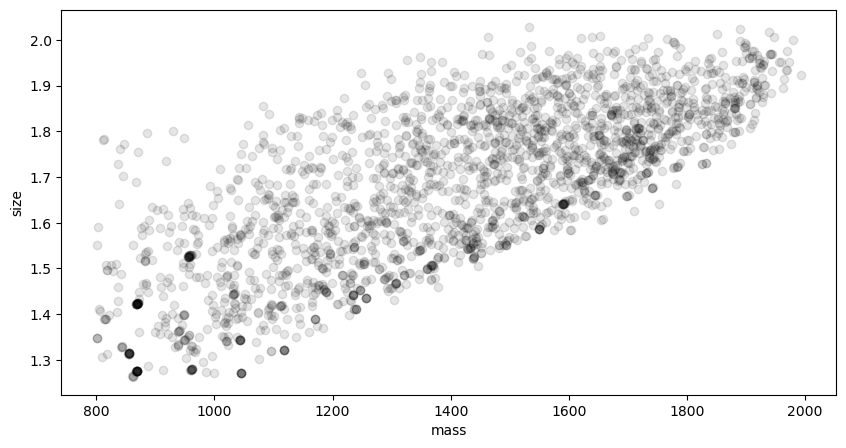

In [31]:
plt.figure()
tp.mass_size(t.groupby('particle').mean());

In [32]:
t2 = t1[((t1['mass'] > 5) & (t1['size'] < 4.0) &
         (t1['ecc'] < 0.3))]

print('Before:', t1['particle'].nunique())
print('After:', t2['particle'].nunique())

Before: 528
After: 511


In [33]:
#t2
#t2.ndim
#type(t2)

In [34]:
# Save as CSV
#t2.to_csv('output.csv')

# Save as Excel
#t2.to_excel('output.xlsx')

In [35]:
#w=pd.read_csv('particle_coordinates.csv')
#w

In [36]:
#plt.figure()
#tp.annotate(t2[t2['frame'] == 0], frames_single_tiff[0]);

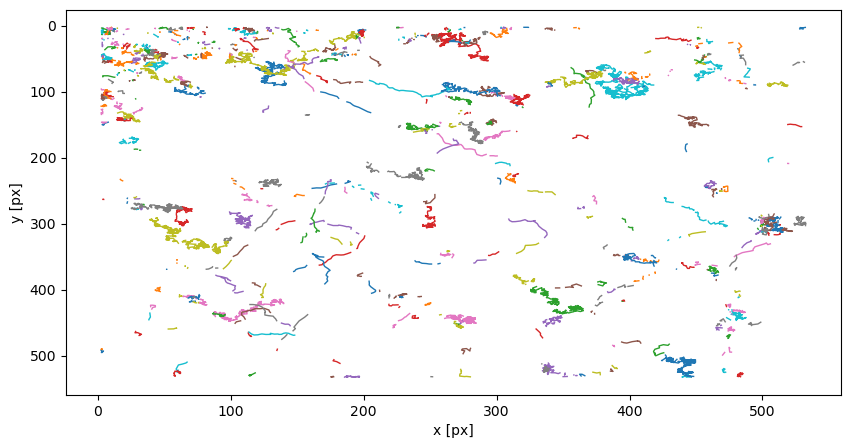

In [37]:
plt.figure()
tp.plot_traj(t2);

In [38]:
#d = tp.compute_drift(t2)

In [39]:
#d.plot()
#plt.show()

In [40]:
#tm = tp.subtract_drift(t2.copy(), d)

In [41]:
#ax = tp.plot_traj(tm)
#plt.show()

In [42]:
#plt.figure()
#tp.plot_traj(t1)